![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Wind direction offset correction¶
</b>
</span>

---
**Notebook version**: `2` (24 Oct 2023)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Background**

## Summary
The `WindDirOffset` class compares yearly wind direction histograms to a reference histogram build from specified reference years, detects yearly offsets in comparison to reference and corrects wind directions for detected yearly offsets.

## Data
- This example uses wind direction data 2005-2022 from the grassland site [CH-FRU](https://www.swissfluxnet.ethz.ch/index.php/sites/ch-fru-fruebuel/site-info-ch-fru/).
- All wind directions have been calculated assuming a sonic orientation of `0°` (north arrow of the sonic points to `0°`).

## Problem
- The wind directions from the site are wrong for some years because the **true**  orientation of the sonic anemometer was unknown.
- However, the sonic orientation of `0°` is correct for 2021 and 2022.

## Solution
- Calculate wind directions 2005-2022 using a sonic orientation setting of 0° for all years. Here, wind directions were calculated using [EddyPro](https://www.licor.com/env/support/EddyPro/software.html).
- Analyze and correct the wind direction time series 2005-2022 using the `WindDirOffset` class.
- As reference the the histogram of the wind direction data 2021-2022 is used. In these two years, the sonic orientation is known to be `0°`.


## Results
- Wind direction time series corrected for detected offsets.
- Overview of detected yearly offsets. These can be used to re-calculate wind directions. 
    - If the uncorrected sonic orientation was `0°` and the detected offset is `196` then the corrected sonic orientation would be `196°`.
    - If the uncorrected sonic orientation was `0°` and the detected offset is `-20` then the corrected sonic orientation would be `340°`.    

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from diive.configs.exampledata import load_exampledata_winddir
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
from diive.pkgs.corrections.winddiroffset import WindDirOffset

warnings.filterwarnings('ignore')
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.82.1


</br>

# **Docstring**

In [2]:
help(WindDirOffset)

Help on class WindDirOffset in module diive.pkgs.corrections.winddiroffset:

class WindDirOffset(builtins.object)
 |  WindDirOffset(winddir: pandas.core.series.Series, hist_ref_years: list, offset_start: int = -100, offset_end: int = 100, hist_n_bins: int = 360)
 |  
 |  Compare yearly wind direction histograms to reference, detect
 |  offset in comparison to reference and correct wind directions
 |  for offset per year
 |  
 |  - Example notebook available in:
 |      notebooks/Corrections/WindDirectionOffset.ipynb
 |  
 |  Methods defined here:
 |  
 |  __init__(self, winddir: pandas.core.series.Series, hist_ref_years: list, offset_start: int = -100, offset_end: int = 100, hist_n_bins: int = 360)
 |      Build histogram of wind directions for each year and compare to reference
 |      histogram built from data in reference years
 |      
 |      (1) Build reference histogram of wind directions from reference years
 |      (2) For each year:
 |          2a: Add constant offset to wind

</br>

# **Load example data**

In [3]:
df = load_exampledata_winddir()
df

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_winddirection_degrees_CH-FRU_2005-2022.parquet (0.025 seconds). Detected time resolution of <30 * Minutes> / 30min 


,wind_dir
TIMESTAMP_MIDDLE,
2005-07-05 08:45:00,138.1
2005-07-05 09:15:00,150.2
2005-07-05 09:45:00,156.2
2005-07-05 10:15:00,159.0
2005-07-05 10:45:00,133.8
...,...
2022-12-31 22:45:00,54.7
2022-12-31 23:15:00,88.5
2022-12-31 23:45:00,108.9


</br>

# **Prepare data**

In [4]:
# Get wind direction time series as series
col = 'wind_dir'
winddir = df[col].copy()
winddir = winddir.loc[winddir.index.year <= 2022]
winddir = winddir.dropna()

In [5]:
winddir

TIMESTAMP_MIDDLE
2005-07-05 08:45:00    138.1
2005-07-05 09:15:00    150.2
2005-07-05 09:45:00    156.2
2005-07-05 10:15:00    159.0
2005-07-05 10:45:00    133.8
                       ...  
2022-12-31 21:45:00     35.3
2022-12-31 22:15:00     74.9
2022-12-31 22:45:00     54.7
2022-12-31 23:15:00     88.5
2022-12-31 23:45:00    108.9
Name: wind_dir, Length: 292131, dtype: float64

</br>

# **Calculate yearly wind direction offsets**

In [6]:
wds = WindDirOffset(winddir=winddir, offset_start=-50, offset_end=50, hist_ref_years=[2021, 2022], hist_n_bins=360)

Working on year 2005 ...
Working on year 2006 ...
Working on year 2007 ...
Working on year 2008 ...
Working on year 2009 ...
Working on year 2010 ...
Working on year 2011 ...
Working on year 2012 ...
Working on year 2013 ...
Working on year 2014 ...
Working on year 2015 ...
Working on year 2016 ...
Working on year 2017 ...
Working on year 2018 ...
Working on year 2019 ...
Working on year 2020 ...
Working on year 2021 ...
Working on year 2022 ...


</br>

# **Results**

## Yearly wind direction offsets

In [7]:
yearlyoffsets_df = wds.get_yearly_offsets()
yearlyoffsets_df

,YEAR,OFFSET
0,2005.0,-23.0
1,2006.0,-23.0
2,2007.0,-27.0
3,2008.0,-27.0
4,2009.0,-23.0
5,2010.0,-25.0
6,2011.0,-24.0
7,2012.0,-27.0
8,2013.0,-26.0
9,2014.0,-23.0


## Corrected wind direction

In [8]:
winddir_corrected = wds.get_corrected_wind_directions()
winddir_corrected

TIMESTAMP_MIDDLE
2005-07-05 08:45:00    115.1
2005-07-05 09:15:00    127.2
2005-07-05 09:45:00    133.2
2005-07-05 10:15:00    136.0
2005-07-05 10:45:00    110.8
                       ...  
2022-12-31 21:45:00     35.3
2022-12-31 22:15:00     74.9
2022-12-31 22:45:00     54.7
2022-12-31 23:15:00     88.5
2022-12-31 23:45:00    108.9
Name: wind_dir, Length: 292131, dtype: float64

## Plot before / after offset correction

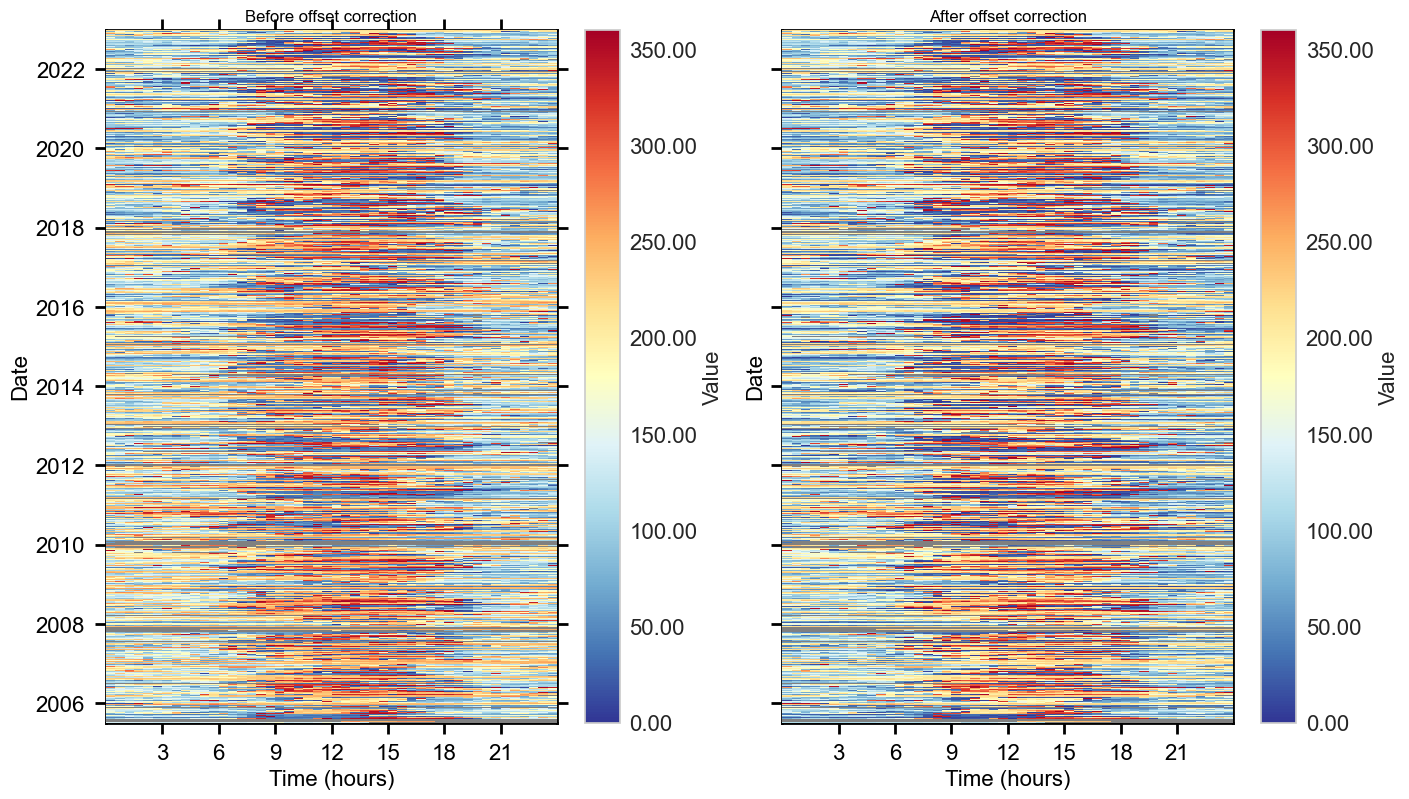

In [9]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 2)  # rows, cols
ax_before = fig.add_subplot(gs[0, 0])
ax_after = fig.add_subplot(gs[0, 1], sharey=ax_before)
HeatmapDateTime(ax=ax_before, series=winddir).plot()
HeatmapDateTime(ax=ax_after, series=winddir_corrected).plot()
ax_before.set_title("Before offset correction", color='black')
ax_after.set_title("After offset correction", color='black')
ax_after.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

</br>

# End of notebook

In [10]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-09-19 23:37:50
